# Определение перспективного тарифа для телеком компании

## Описание проекта

В данном проекте представлены данные федерального оператора сотовой связи "Мегалайн". Для корректировки рекламного бюджета коммерческий департамент хочет выяснить, какой тариф, "Смарт" или "Ультра", приносит больше денег. 
В проекте представлен предварительный анализ данных на небольшой выборке клиентов (всего 500 пользователей): кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

#### Тариф «Смарт»
##### Ежемесячная плата: 550 рублей
##### Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
##### Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля

сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»
##### Ежемесячная плата: 1950 рублей
##### Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
##### Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль

сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import norm
import scipy.stats as st

plt.style.use('ggplot')

In [2]:
calls=pd.read_csv('/datasets/calls.csv')
internet=pd.read_csv('/datasets/internet.csv')
messages=pd.read_csv('/datasets/messages.csv')
tariffs=pd.read_csv('/datasets/tariffs.csv')
users=pd.read_csv('/datasets/users.csv')

In [3]:
dfs=[calls,internet,messages,tariffs,users]

In [4]:
for i in dfs:
    display(i.head(5))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
for i in dfs:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Данные содержат информацию по 500 абонентам за 2018 год. 
Пропущенных значений нет, помимо колонки churn_date в users. Поскольку это колонка - для дат прекращения пользования тарифом, можно сделать вывод, что пропуски здесь оставлены намерено. Отсутствие даты говорит о том, что абонент продолжает пользователься тарифом на момент выгрузки данных. 


### Шаг 2. Подготовьте данные

##### Приведите данные к нужным типам

Колонки с датой считались как object. Требуется ручная замена типа данных. 

In [6]:
calls.call_date=pd.to_datetime(calls.call_date)
internet.session_date=pd.to_datetime(internet.session_date)
messages.message_date=pd.to_datetime(messages.message_date)
users.reg_date=pd.to_datetime(users.reg_date)
users.churn_date=pd.to_datetime(users.churn_date)

##### Найдите и исправьте ошибки в данных

Добавим во все таблицы месяцы, поскольку все тарифы рассчитываются по месячному потреблению трафика. 

In [7]:
calls['month']=calls.call_date.dt.month
internet['month']=internet.session_date.dt.month
messages['month']=messages.message_date.dt.month
users['reg_month']=users.reg_date.dt.month
users['churn_month']=users.churn_date.dt.month

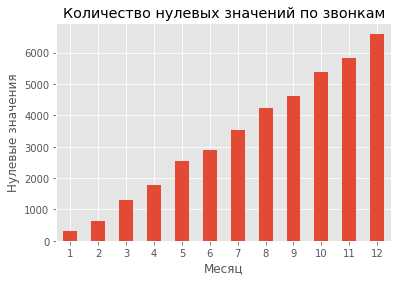

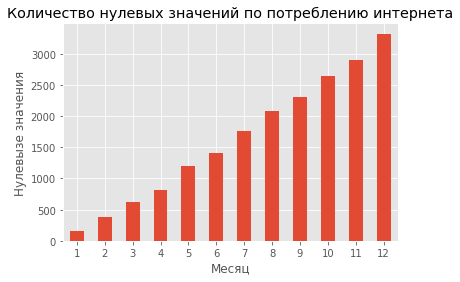

In [8]:
calls[calls.duration==0].groupby(by='month').count()['id'].plot(kind='bar')
plt.title('Количество нулевых значений по звонкам')
plt.ylabel('Нулевые значения')
plt.xlabel('Месяц')
plt.xticks(rotation=0)
plt.show()


internet[internet.mb_used==0].groupby(by='month').count()['id'].plot(kind='bar')
plt.title('Количество нулевых значений по потреблению интернета')
plt.ylabel('Нулевызе значения')
plt.xlabel('Месяц')
plt.xticks(rotation=0)
plt.show()


Посмотрим, с какой регулярностью подключались новые пользователи. 

Стоит еще раз отметить, что данные во всех таблицах приведены с 01 января 2018 по 31 декабря 2018. Это также относится к дате регистраций новых пользователей. 

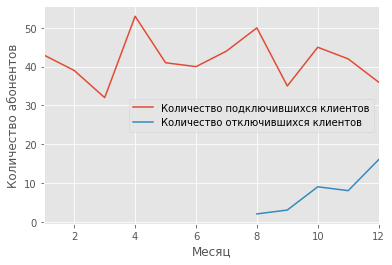

In [9]:
users.groupby(by='reg_month').user_id.count().plot()
users.groupby(by='churn_month').user_id.count().plot()
plt.ylabel('Количество абонентов')
plt.xlabel('Месяц')
plt.xticks(rotation=0)
plt.legend(['Количество подключившихся клиентов','Количество отключившихся клиентов'])

Поэтому важно смотреть кумулятивную сумму, прежде чем делать выводы о том, что нулевые значения могут являться ошибкой.

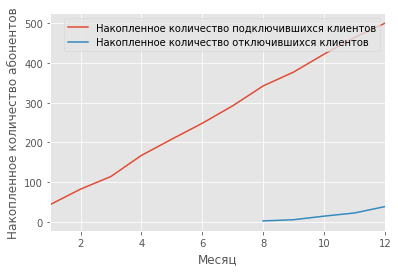

In [10]:
users.groupby(by='reg_month').user_id.count().cumsum().plot()
users.groupby(by='churn_month').user_id.count().cumsum().plot()
plt.ylabel('Накопленное количество абонентов')
plt.xlabel('Месяц')
plt.xticks(rotation=0)
plt.legend(['Накопленное количество подключившихся клиентов','Накопленное количество отключившихся клиентов'])

Кореляция между нулевыми значениями почти единица, что позволяет нам утверждать, что нулевые значения неслучайны, и их увеличение связано с появлением новых абонентов. 

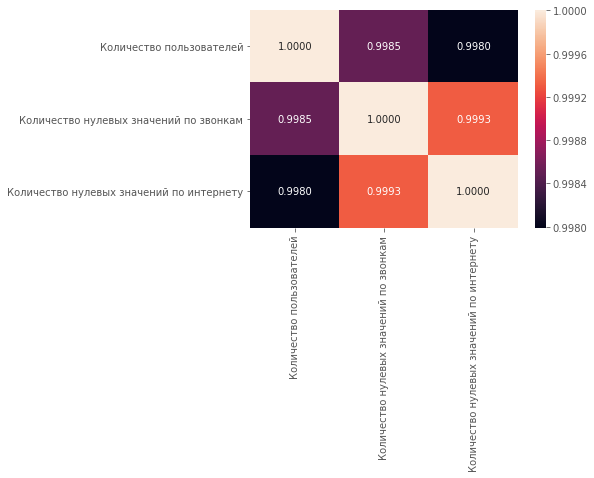

In [11]:
sns.heatmap(pd.concat([users.groupby(by='reg_month').user_id.count().cumsum().to_frame(name='Количество пользователей'),
           calls[calls.duration==0].groupby(by='month').count()['id'].to_frame(name='Количество нулевых значений по звонкам'),
          internet[internet.mb_used==0].groupby(by='month').count()['id'].to_frame(name='Количество нулевых значений по интернету')],axis=1).corr(),annot=True,fmt='.4f')

Тем не менее, доля по месяцам непостоянна

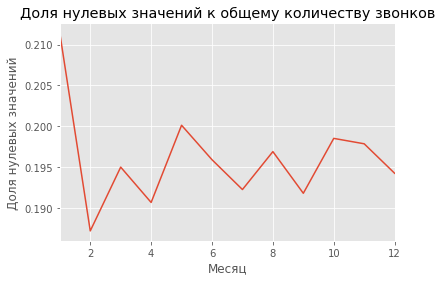

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text xticklabel objects>)

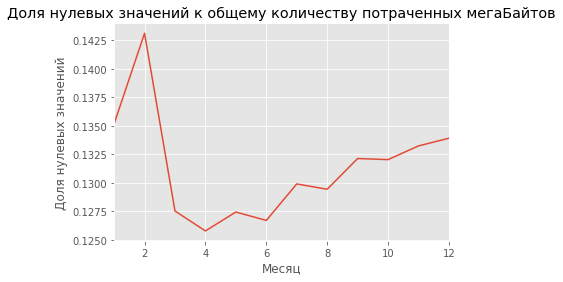

In [12]:
(calls[calls['duration']==0].groupby(by='month').user_id.count()/calls.groupby(by='month').user_id.count()).plot()
plt.title('Доля нулевых значений к общему количеству звонков')
plt.ylabel('Доля нулевых значений')
plt.xlabel('Месяц')
plt.xticks(rotation=0)
plt.show()
(internet[internet.mb_used==0].groupby(by='month').user_id.count()/internet.groupby(by='month').user_id.count()).plot()
plt.title('Доля нулевых значений к общему количеству потраченных мегаБайтов')
plt.ylabel('Доля нулевых значений')
plt.xlabel('Месяц')
plt.xticks(rotation=0)

Тем не менее, нули - это скорее всего "бесполезная" информация, которая в дальнейшем только будет завышать значение по количеству звонков. 

In [13]:
calls=calls[calls['duration']!=0]
internet=internet[internet['mb_used']!=0]

Также из описаний тарифов мы знаем, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Поэтому необходимо все значения по интернет трафику и звонкам округлить до большего. 

In [14]:
calls['duration']=np.ceil(calls['duration'])
internet['mb_used']=np.ceil(internet['mb_used'])



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Посчитайте для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам;
##### количество отправленных сообщений по месяцам;
##### объем израсходованного интернет-трафика по месяцам;
##### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


Соберем количество сообщений, звонков и потребляемого интернет-трафика в одну таблицу. 

In [15]:
data=pd.concat([calls.pivot_table('duration','month','user_id',aggfunc='sum').unstack().to_frame(name='Количество минут'),
                calls.pivot_table('duration','month','user_id',aggfunc='count').unstack().to_frame(name='Количество звонков'),
          internet.pivot_table('mb_used','month','user_id',aggfunc='sum').unstack().to_frame(name='Количество мегаБайтов'),
          messages.groupby(by=['user_id','month']).id.count().to_frame(name='Количество сообщений')],axis=1)
data

Количество минут  Количество звонков  Количество мегаБайтов  \
user_id month                                                                
1000    1                   NaN                 NaN                    NaN   
        2                   NaN                 NaN                    NaN   
        3                   NaN                 NaN                    NaN   
        4                   NaN                 NaN                    NaN   
        5                 159.0                17.0                 2256.0   
...                         ...                 ...                    ...   
1499    8                   NaN                 NaN                    NaN   
        9                  70.0                 8.0                 1848.0   
        10                449.0                44.0                17809.0   
        11                612.0                62.0                17984.0   
        12                492.0                56.0                13077.0   

               Количество сообщений  
user_id month                        
1000    1                       NaN  
        2                       NaN  
        3                       NaN  
        4                       NaN  
        5                      22.0  
...                             ...  
1499    8                       NaN  
        9                      11.0  
        10                     48.0  
        11                     59.0  
        12                     66.0  

[5976 rows x 4 columns]

In [16]:
# Присоединим название тарифа каждого абонента
data=data.reset_index().join(users.set_index('user_id')['tariff'],on='user_id')
data.sample(10)


,user_id,month,Количество минут,Количество звонков,Количество мегаБайтов,Количество сообщений,tariff
77,1006,6,478.0,48.0,12388.0,NaN,smart
1327,1110,8,348.0,40.0,16184.0,34.0,smart
3575,1298,12,634.0,73.0,25900.0,38.0,smart
2738,1229,3,NaN,NaN,NaN,NaN,smart
1613,1135,6,564.0,58.0,18344.0,25.0,smart
1117,1093,2,NaN,NaN,NaN,NaN,smart
5091,1426,4,NaN,NaN,NaN,NaN,smart
1696,1142,5,468.0,51.0,23670.0,42.0,smart
3326,1278,3,NaN,NaN,NaN,NaN,smart
4181,1349,6,NaN,NaN,NaN,NaN,ultra


In [17]:
data=data.join(tariffs.set_index('tariff_name'),on='tariff')
data['over_messages']=data['Количество сообщений']-data['messages_included']
data['over_mbs']=data['Количество мегаБайтов']-data['mb_per_month_included']
data['over_minutes']=data['Количество минут']-data['minutes_included']
for i in data.index:
    if data.at[i,'over_messages']<0:
        data.at[i,'over_messages']=0
    if data.at[i,'over_mbs']<0:
        data.at[i,'over_mbs']=0
    if data.at[i,'over_minutes']<0:
        data.at[i,'over_minutes']=0
        
data['revenue']=(((data['rub_per_gb']/1024)*data['over_mbs'])+(data['rub_per_message']*data['over_messages'])+(data['rub_per_minute']*data['over_minutes'])+(data['rub_monthly_fee']))
data

,user_id,month,Количество минут,Количество звонков,Количество мегаБайтов,Количество сообщений,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_messages,over_mbs,over_minutes,revenue
0,1000,1,NaN,NaN,NaN,NaN,ultra,1000,30720,3000,1950,150,1,1,NaN,NaN,NaN,NaN
1,1000,2,NaN,NaN,NaN,NaN,ultra,1000,30720,3000,1950,150,1,1,NaN,NaN,NaN,NaN
2,1000,3,NaN,NaN,NaN,NaN,ultra,1000,30720,3000,1950,150,1,1,NaN,NaN,NaN,NaN
3,1000,4,NaN,NaN,NaN,NaN,ultra,1000,30720,3000,1950,150,1,1,NaN,NaN,NaN,NaN
4,1000,5,159.0,17.0,2256.0,22.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,1499,8,NaN,NaN,NaN,NaN,smart,50,15360,500,550,200,3,3,NaN,NaN,NaN,NaN
5972,1499,9,70.0,8.0,1848.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.000000
5973,1499,10,449.0,44.0,17809.0,48.0,smart,50,15360,500,550,200,3,3,0.0,2449.0,0.0,1028.320312
5974,1499,11,612.0,62.0,17984.0,59.0,smart,50,15360,500,550,200,3,3,9.0,2624.0,112.0,1425.500000


### Шаг 3. Проанализируйте данные

#### Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Тариф Смарт более популярный. Это также заметно на графике разностей по месяцам (каждый месяц к тарифу Смарт подключается от 20 до 40 абонентов, в то время как к Ультра подключается от 5 до 20).

Удивительно, что графики по подключениям зеркалят, что может говорить, что осуществлялись разные рекламные кампании, направленные на подключение к разным тарифам. Но точного ответа из данных узнать невозможно.   

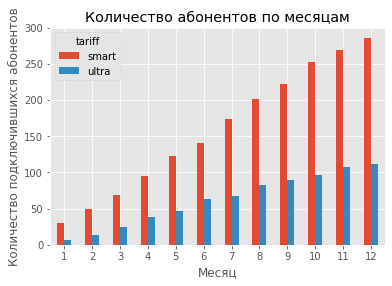

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text xticklabel objects>)

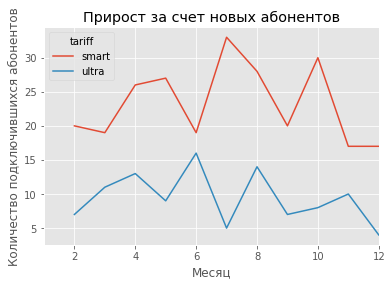

In [18]:
data.groupby(by=['tariff','month']).count()['revenue'].unstack().T.plot(kind='bar')
plt.title('Количество абонентов по месяцам')
plt.ylabel('Количество подключившихся абонентов')
plt.xlabel('Месяц')
plt.xticks(rotation=0)
plt.show()
data.groupby(by=['tariff','month']).count()['revenue'].unstack().T.diff().plot()
plt.title('Прирост за счет новых абонентов')
plt.ylabel('Количество подключившихся абонентов')
plt.xlabel('Месяц')
plt.xticks(rotation=0)

Распределение медианных значений для каждого тарифного плана различается. Так, можно заметить, что распределение по тарифу смарт более вытянутое в длину, а в ультра распределение более плоское. Это относится как к количеству минут,так и потребляемому интернет-траффику и количеству сообщений. Из-за того, что запас минут/мегабайтов/сообщений у пользователей тарифа Ультра достаточно большой, они потребляют более свободно трафик. 

In [26]:
data.pivot_table(['Количество минут','Количество мегаБайтов','Количество сообщений','Количество звонков'],'user_id','tariff',aggfunc=[np.mean,np.median])



mean                                         \
        Количество звонков         Количество мегаБайтов            
tariff               smart   ultra                 smart    ultra   
user_id                                                             
1000                   NaN  36.625                   NaN  13436.5   
1001             46.000000     NaN          16252.500000      NaN   
1002             24.714286     NaN          16597.571429      NaN   
1003                   NaN  85.600                   NaN  11465.8   
1004                   NaN  17.375                   NaN  18646.5   
...                    ...     ...                   ...      ...   
1495                   NaN  93.200                   NaN  25507.2   
1496             55.583333     NaN          22605.750000      NaN   
1497             52.000000     NaN          15208.666667      NaN   
1498             36.500000     NaN          18631.500000      NaN   
1499             42.500000     NaN          12679.500000      NaN   

                                                               \
        Количество минут          Количество сообщений          
tariff             smart    ultra                smart  ultra   
user_id                                                         
1000                 NaN  320.750                  NaN   62.0   
1001          422.000000      NaN                  NaN    NaN   
1002          216.714286      NaN                 10.0    NaN   
1003                 NaN  764.400                  NaN   76.0   
1004                 NaN  123.375                  NaN  149.0   
...                  ...      ...                  ...    ...   
1495                 NaN  784.000                  NaN   68.0   
1496          498.666667      NaN                 39.0    NaN   
1497          468.666667      NaN                 17.0    NaN   
1498          323.250000      NaN                 42.0    NaN   
1499          405.750000      NaN                 46.0    NaN   

                    median                                        \
        Количество звонков        Количество мегаБайтов            
tariff               smart  ultra                 smart    ultra   
user_id                                                            
1000                   NaN   39.5                   NaN  14325.5   
1001                  46.0    NaN               16252.5      NaN   
1002                  25.0    NaN               17601.0      NaN   
1003                   NaN   95.0                   NaN  11368.0   
1004                   NaN   18.0                   NaN  17828.5   
...                    ...    ...                   ...      ...   
1495                   NaN  112.0                   NaN  29393.0   
1496                  60.0    NaN               24067.5      NaN   
1497                  50.0    NaN               14174.0      NaN   
1498                  36.5    NaN               21385.0      NaN   
1499                  50.0    NaN               15443.0      NaN   

                                                             
        Количество минут        Количество сообщений         
tariff             smart  ultra                smart  ultra  
user_id                                                      
1000                 NaN  339.0                  NaN   65.0  
1001               422.0    NaN                  NaN    NaN  
1002               214.0    NaN                 11.0    NaN  
1003                 NaN  824.0                  NaN   83.0  
1004                 NaN  132.5                  NaN  154.5  
...                  ...    ...                  ...    ...  
1495                 NaN  954.0                  NaN   82.0  
1496               524.0    NaN                 41.5    NaN  
1497               490.0    NaN                 17.0    NaN  
1498               323.5    NaN                 43.0    NaN  
1499               470.5    NaN                 53.5    NaN  

[498 rows x 16 columns]

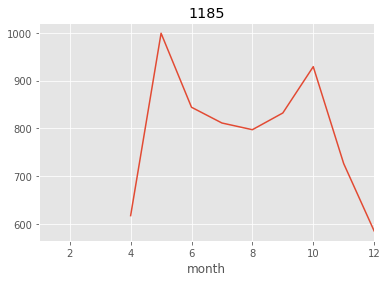

In [55]:
a=1185
data[data['user_id']==a].set_index('month')['Количество минут'].plot()
plt.title(a);

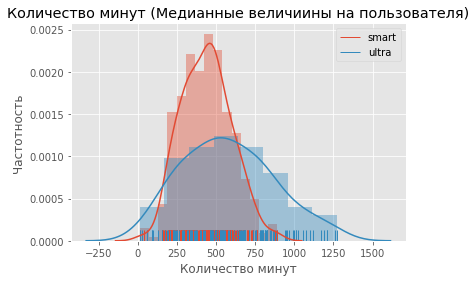

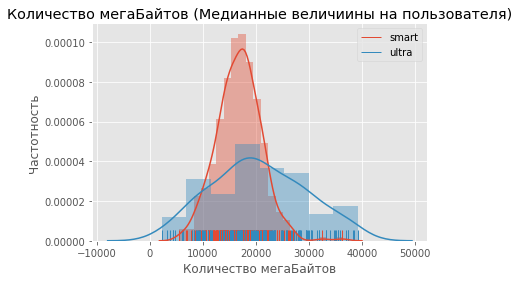

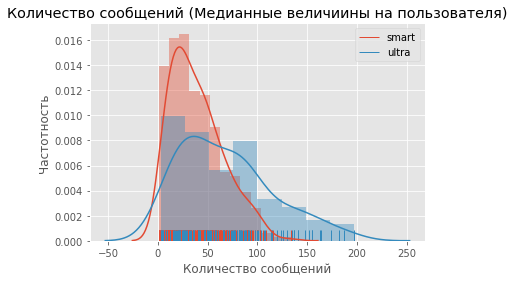

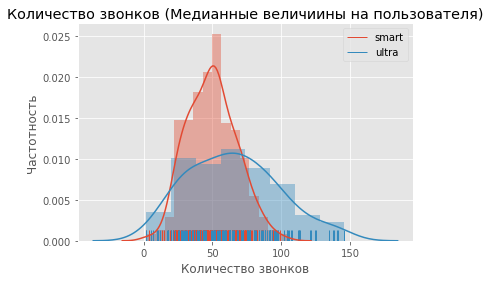

In [19]:
for i in ['Количество минут','Количество мегаБайтов','Количество сообщений','Количество звонков']:
        sns.distplot(data.pivot_table(['Количество минут','Количество мегаБайтов','Количество сообщений','Количество звонков'],'user_id','tariff',aggfunc=[np.mean,np.median])['median'][i]['smart'].dropna(),hist=True, rug=True,kde=True)
        sns.distplot(data.pivot_table(['Количество минут','Количество мегаБайтов','Количество сообщений','Количество звонков'],'user_id','tariff',aggfunc=[np.mean,np.median])['median'][i]['ultra'].dropna(),hist=True, rug=True,kde=True)
        plt.legend(['smart','ultra'])
        plt.title(i+' (Медианные величиины на пользователя)')
        plt.xlabel(i)
        plt.ylabel('Частотность')
        plt.show()


Это может говорить о том, что дисперсия и стандартное отклонение по тарифу Ультра больше, чем по тарифу Смарт. Это показывают тепловые карты ниже. 
Также можно заметить, что медианные значения по двум тарифам различаются не очень сильно.

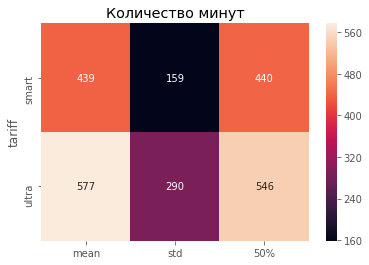

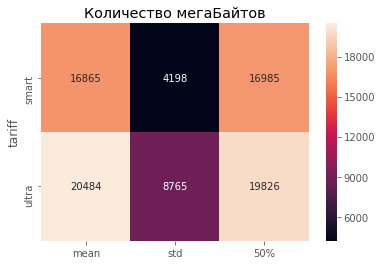

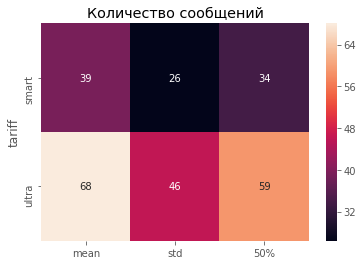

In [20]:
for i in ['Количество минут','Количество мегаБайтов','Количество сообщений']:
    sns.heatmap((data.pivot_table(['Количество минут','Количество мегаБайтов','Количество сообщений'],'user_id','tariff',aggfunc=[np.mean,np.median])['median'][i]).describe().T[['mean','std','50%']],annot=True,fmt='.0f')
    plt.title(i)
    plt.show()

При этом можно заметить, что переходят границу допустимого количества трафика в основном пользователи тарифа Смарт. Пользователи тарифа Ультра редко выходят за пределы допустимого трафика по абонентской плате. 

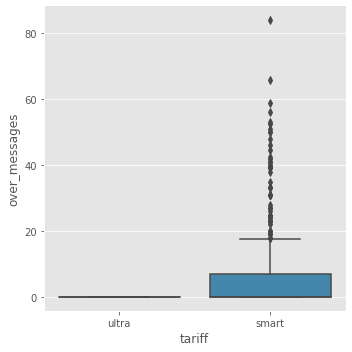

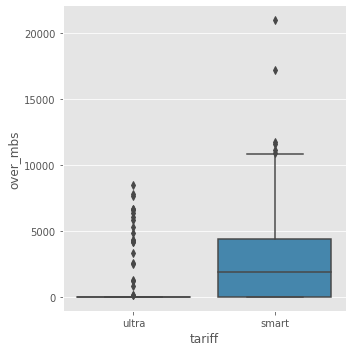

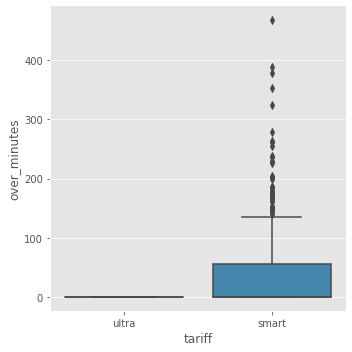

In [21]:
for i in ['over_messages',
       'over_mbs', 'over_minutes']:
    sns.catplot(data=data.pivot_table(['over_messages',
       'over_mbs', 'over_minutes'],['user_id','tariff'],aggfunc=[np.mean,np.median])['median'].reset_index(),
            x='tariff',y=i,kind='box')

Исходя из распределений дохода с покупателей, можно сказать, что пользователи тарифа Смарт с большей вероятностью будут больше абонентской платы, поскольку потребляют большего допустимой нормы трафика. При этом, как можно увидеть из распределения ниже, некоторые пользователи тарифа Смарт иногда платят больше, чем абоненты тарифа Ультра. 

Text(0.5, 0, 'Медианная плата в месяц за услуги связи')

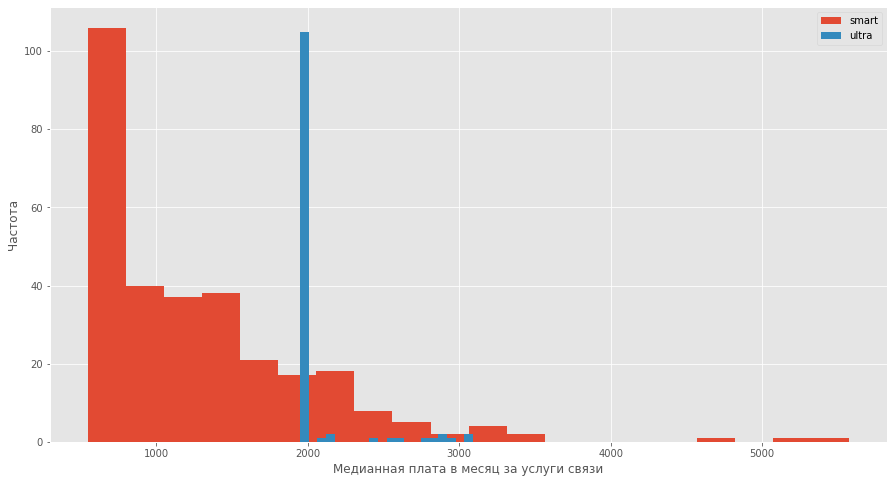

In [22]:
(data.groupby(['tariff','user_id'])['revenue'].median().unstack().T)['smart'].hist(bins=20,figsize=(15,8))
(data.groupby(['tariff','user_id'])['revenue'].median().unstack().T)['ultra'].hist(bins=20,figsize=(15,8))
plt.legend(['smart','ultra'])
plt.ylabel('Частота')
plt.xlabel('Медианная плата в месяц за услуги связи')


### Шаг 4. Проверьте гипотезы

#### средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Проверяем следующую гипотезу. 

H0: средние выручки пользователей тарифов Смарт и Ультра равны между собой

H1: средние выручки пользователей тарифов Смарт и Ультра не равны между собой

In [23]:
smart = data[data.tariff=='smart']['revenue'].dropna()
ultra = data[data.tariff=='ultra']['revenue'].dropna()


alpha = .05

results = st.ttest_ind(
    smart, 
    ultra, 
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.4857008580733005e-247
Отвергаем нулевую гипотезу


p-значение меньше допустимой нормы в 5%, следовательно, нулевая гипотеза отвергается. Это значит, что выручки с тарифов Смарт и Ультра не равны друг другу.

Проверим одностороннюю гипотезу. 

H0: средние выручки пользователей тарифов Смарт и Ультра равны между собой

Н1: средняя выручка по тарифу Ультра больше, чем по тарифу Смарт

In [24]:
smart = data[data.tariff=='smart']['revenue'].dropna()
ultra = data[data.tariff=='ultra']['revenue'].dropna()


alpha = .05

results = st.ttest_ind(
    smart, 
    ultra, 
    equal_var=False)

print('p-value:', results.pvalue/2)

if ((results.pvalue/2 < alpha) and (ultra.mean() > smart.mean())):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 7.428504290366502e-248
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем и принимаем тот факт, что тариф Ультра приносит больше выручки, чем тариф Смарт. 

In [25]:
data.groupby(by='tariff').revenue.mean()

tariff
smart    1234.878682
ultra    2041.283462
Name: revenue, dtype: float64

Это подтверждает и проведенный бутстрап, что вероятность пересечений данных распределений супермала:

100%|██████████| 1000/1000 [00:03<00:00, 250.52it/s]


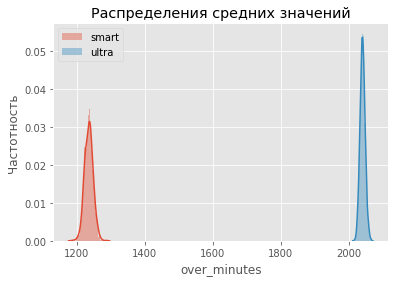

In [26]:
from tqdm import tqdm
means_smart = []
for _ in tqdm(range(1000)):
    sample = np.random.choice(data[data.tariff=='smart']['revenue'].dropna(), size=len(data[data.tariff=='smart']['revenue']), replace=True)
    means_smart.append(sample.mean())
    
means_ultra = []
for _ in tqdm(range(1000)):
    sample = np.random.choice(data[data.tariff=='ultra']['revenue'].dropna(), size=len(data[data.tariff=='ultra']['revenue']), replace=True)
    means_ultra.append(sample.mean())

sns.distplot(means_smart)
sns.distplot(means_ultra)

plt.legend(['smart','ultra'])
plt.title('Распределения средних значений')
plt.xlabel(i)
plt.ylabel('Частотность')
plt.show()
    

#### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Проверяем следующую гипотезу. 

H0: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [27]:
data=data.join(users.set_index('user_id')['city'],on='user_id')

In [28]:
msk = data[data.city=='Москва']['revenue'].dropna()
non_msk = data[data.city!='Москва']['revenue'].dropna()


alpha = .05

results = st.ttest_ind(
    msk, 
    non_msk, 
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.07176958761118217
Не получилось отвергнуть нулевую гипотезу


p-value больше, чем 0.05, что говорит о том, что отвергуть нулевую гипотезу мы не можем, следовательно стоит ожидать, что средняя выручка не отличается Москвы. И действительно, различие минимально:

In [29]:
print('Средняя выручка по МСК: ',data[data.city=='Москва']['revenue'].mean())
print('Средняя выручка по не-МСК(другим городам): ',data[data.city!='Москва']['revenue'].mean())

Средняя выручка по МСК:  1517.6101705702647
Средняя выручка по не-МСК(другим городам):  1448.972556297545


Нагляднее можно увидеть бутстрапом. Пересекающеися области - это полученная вероятность из p-value, когда нулевая гипотеза равна. 

100%|██████████| 1000/1000 [00:04<00:00, 208.26it/s]


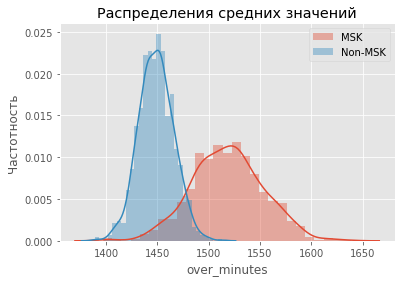

In [30]:
means_msk = []
for _ in tqdm(range(1000)):
    sample = np.random.choice(data[data.city=='Москва']['revenue'].dropna(), size=len(data[data.city=='Москва']['revenue'].dropna()), replace=True)
    means_msk.append(sample.mean())
    
means_non_msk = []
for _ in tqdm(range(1000)):
    sample = np.random.choice(data[data.city!='Москва']['revenue'].dropna(), size=len(data[data.city!='Москва']['revenue'].dropna()), replace=True)
    means_non_msk.append(sample.mean())

sns.distplot(means_msk)
sns.distplot(means_non_msk)

plt.legend(['MSK','Non-MSK'])
plt.title('Распределения средних значений')
plt.xlabel(i)
plt.ylabel('Частотность')
plt.show()

### Шаг 5. Напишите общий вывод

Таким образом, доход от тарифа Ультра превосходит доход от тарифа Смарт. 

Однако чаще всего пользователи не выполняют норму по Ультра и редко выходят за пределы допустимого трафика по минутам/мегабайтам/сообщениям. 

Тем не менее, медианные значения по потреблению трафика по минутам/мегабайтам/сообщениям не сильно отличаются по двум тарифам, площади распределений по абонементам сильно совпадают, что может свидетельствовать о том, что пользователи тарифа Ультра сильно переплачивают (это заметно и по тому, что приращение пользователей тарифа Ультра идет медленнее, чем пользователей тарифа Смарт). 

Средняя выручка по Москве не отличается от средней выручке по регионам. 



